In [1]:
### Installs
!pip install librosa torchaudio transformers openl3 tensorflow soundfile

  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.4/323.4 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 779.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 M

In [2]:
pip install openl3

In [3]:
### Imports
import pandas as pd
import numpy as np

# Audio Processing
import torch
import torchaudio
import librosa
import soundfile as sf

# Transformers
from transformers import (
    Wav2Vec2Processor, Wav2Vec2Model,
    AutoProcessor, HubertModel
)

# TensorFlow + VGGish
import tensorflow as tf
import tensorflow_hub as hub

# OpenL3
import openl3

In [4]:
### Access the hf dataset
import os
from getpass import getpass

hf_token = getpass('Enter your Hugging Face token:')
os.environ['HF_TOKEN'] = hf_token

!huggingface-cli login --token $HF_TOKEN
!huggingface-cli download ControlNet/AV-Deepfake1M-PlusPlus train/train.zip.001 --repo-type dataset --local-dir ./AV-Deepfake1M-PlusPlus

Enter your Hugging Face token:··········
The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
The token `itau-group4` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.
train/train.zip.001: 100% 1.05G/1.05G [00:15<00:00, 67.1MB/s]
Download complete. Moving file to AV-Deepfake1M-PlusPlus/train/train.zip.001
AV-Deepfake1M-PlusPlus/train/train.zip.001


In [5]:
\!7z x -aoa AV-Deepfake1M-PlusPlus/train/train.zip.001 -oAV-Deepfake1M-PlusPlus/train/


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1048576000 bytes (1000 MiB)

Extracting archive: AV-Deepfake1M-PlusPlus/train/train.zip.001
  0% 1 Open           
train.zip
ERRORS:
Unexpected end of archive

--
Path = AV-Deepfake1M-PlusPlus/train/train.zip.001
Type = Split
Physical Size = 1048576000
Volumes = 1
Total Physical Size = 1048576000
----
Path = train.zip
Size = 1048576000
--
Path = train.zip
Type = zip
ERRORS:
Unexpected end of archive
Physical Size = 1048890151

 88%      0% 39 - train/lrs3/0OkOQhXhsIE/00001/00001.mp4                                                  1% 45 - train/lrs3/0OkOQhXhsIE/00001/00001_p4.mp4

In [ ]:
### mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

In [ ]:
### Access the pkl file for assembly
audio_dataset = pd.read_pickle('/content/drive/MyDrive/Project_4_Deepfake_Detection/Summer 2025/Code/audio_dataset_fixed.pkl')
video_dataset = pd.read_pickle('/content/drive/MyDrive/Project_4_Deepfake_Detection/Summer 2025/Code/video_dataset_fixed.pkl')

In [ ]:
### print video_dataset rows 560-570
print(video_dataset.iloc[560:570])

    video_label                                         video_path  \
560        real  /content/train/lrs3/3LfVxGdczEA/00004/00004_p3...   
561        real  /content/train/lrs3/3LfVxGdczEA/00004/00004_p2...   
562        real  /content/train/lrs3/3LfVxGdczEA/00004/00004_p4...   
563        real    /content/train/lrs3/3LfVxGdczEA/00004/00004.mp4   
564        real  /content/train/lrs3/3lxyiS3CGrk/00001/00001_p3...   
565        real  /content/train/lrs3/3lxyiS3CGrk/00001/00001_p2...   
566        real  /content/train/lrs3/3lxyiS3CGrk/00001/00001_p1...   
567        real  /content/train/lrs3/3lxyiS3CGrk/00001/00001_p4...   
568        real    /content/train/lrs3/3lxyiS3CGrk/00001/00001.mp4   
569        real  /content/train/lrs3/3lxyiS3CGrk/00021/00021_p1...   

                                             json_path  \
560  /content/train/lrs3/3LfVxGdczEA/00004/00004_p3...   
561  /content/train/lrs3/3LfVxGdczEA/00004/00004_p2...   
562  /content/train/lrs3/3LfVxGdczEA/00004/00004_p4... 

In [ ]:
audio_dataset.head()

In [ ]:
video_dataset.head()

In [ ]:
print(len(video_dataset))
print(video_dataset['video_path'].nunique())

1057
514


In [ ]:
print(len(audio_dataset))
print(audio_dataset['video_path'].nunique())

1053
506


In [ ]:
print(audio_dataset['audio_label'].value_counts())
print(video_dataset['video_label'].value_counts())

audio_label
real    635
fake    418
Name: count, dtype: int64
video_label
real    637
fake    420
Name: count, dtype: int64


In [ ]:
# Audio Embedding Functions

### 1. MFCC (Classic handcrafted features)
### may need to pad short audio clips or change
def embedding_mfcc(audio_clip, sr=16000):
    # Convert moviepy audio to numpy
    y = audio_clip.to_soundarray(fps=sr).mean(axis=1)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return mfcc.mean(axis=1)  # Mean over time

### 2. Wav2Vec 2.0 (Self-supervised speech model)
from transformers import Wav2Vec2Processor, Wav2Vec2Model
processor_w2v = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model_w2v = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")
model_w2v.eval()

def embedding_wav2vec(audio_clip, sr=16000):
    y = audio_clip.to_soundarray(fps=sr).mean(axis=1)
    input_values = processor_w2v(y, sampling_rate=sr, return_tensors="pt").input_values
    with torch.no_grad():
        outputs = model_w2v(input_values)
    hidden_states = outputs.last_hidden_state  # (batch, time, dim)

    # Options:
    # return hidden_states.mean(dim=1)         # Mean pooling over time (default)
    # return hidden_states[:, 0, :]            # First time step token (less common)
    return hidden_states.mean(dim=1).squeeze().numpy()

### 3. HuBERT (Better phonetic structure)

model_hubert = HubertModel.from_pretrained("facebook/hubert-base-ls960")
model_hubert.eval()

def embedding_hubert(audio_clip, sr=16000):
    import torch
    y = audio_clip.to_soundarray(fps=sr).mean(axis=1)
    y = torch.tensor(y, dtype=torch.float32).unsqueeze(0)  # shape: (1, time)
    with torch.no_grad():
        outputs = model_hubert(y)
    hidden_states = outputs.last_hidden_state  # shape: (1, time, dim)
    return hidden_states.mean(dim=1).squeeze().numpy()

### 4. VGGish (Supervised, general-purpose audio features)
# vggish_model = hub.load("https://tfhub.dev/google/vggish/1")
vggish_model = hub.load("https://www.kaggle.com/models/google/vggish/TensorFlow2/vggish/1")

def embedding_vggish(audio_clip, sr=16000):
    y = audio_clip.to_soundarray(fps=sr).mean(axis=1).astype(np.float32)

    # Target length = 0.96s = 15360 samples
    target_len = int(sr * 0.96)

    # If too short, pad with zeros (silence)
    if len(y) < target_len:
        y = np.pad(y, (0, target_len - len(y)), mode='constant')

    embeddings = vggish_model(y).numpy()  # shape (N, 128)
    return embeddings.mean(axis=0)  # 128-dim vector

### 5. OpenL3 (Perceptual audio-visual embedding)
def embedding_openl3(audio_clip, sr=48000):  # OpenL3 works best at 48kHz
    y = audio_clip.to_soundarray(fps=sr).mean(axis=1)
    # OpenL3 returns (frames, embedding_size)
    emb, ts = openl3.get_audio_embedding(y, sr, input_repr="mel256", content_type="env", embedding_size=512)
    return emb.mean(axis=0)  # Mean over time


Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import pandas as pd
from moviepy.editor import VideoFileClip
import numpy as np

def extract_embeddings(df, embedding_fn, mode='audio'):
    """
    Args:
        df (pd.DataFrame): DataFrame with columns ['video_path', 'video_label', 'segment_start', 'segment_end']
        embedding_fn (function): Function that takes in either a video clip or audio clip and returns an embedding
        mode (str): 'video' or 'audio'

    Returns:
        pd.DataFrame: A DataFrame with columns ['embedding', 'label']
    """
    results = []

    for i, row in df.iterrows():
        try:
            video = VideoFileClip(row['video_path']).subclip(row['segment_start'], row['segment_end'])

            if mode == 'video':
                emb = embedding_fn(video)
                label = 1 if row['video_label'] == 'fake' else 0
            elif mode == 'audio':
                audio = video.audio
                emb = embedding_fn(audio)
                label = 1 if row['audio_label'] == 'fake' else 0
            else:
                raise ValueError("Mode must be 'video' or 'audio'.")

            results.append({'embedding': emb, 'label': label})
        except Exception as e:
            print(f"Skipping row {i} due to error: {e}")
            continue

    return pd.DataFrame(results)

In [ ]:
### Extracting embeddings

# MFCC
mfcc_embeddings = extract_embeddings(audio_dataset, embedding_mfcc, mode='audio')
X_mfcc = np.stack(mfcc_embeddings['embedding'].values)
y_mfcc = mfcc_embeddings['label'].values

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(



In [ ]:
print(len(X_mfcc))

1053


In [ ]:
# Wav2Vec
wav2vec_embeddings = extract_embeddings(audio_dataset, embedding_wav2vec, mode='audio')
X_wav2vec = np.stack(wav2vec_embeddings['embedding'].values)
y_wav2vec = wav2vec_embeddings['label'].values

In [ ]:
print(len(X_wav2vec))

1053


In [ ]:
print(X_wav2vec[0].shape)

(768,)


In [ ]:
# HuBERT
hubert_embeddings = extract_embeddings(audio_dataset, embedding_hubert, mode='audio')
X_hubert = np.stack(hubert_embeddings['embedding'].values)
y_hubert = hubert_embeddings['label'].values

In [ ]:
print(len(X_hubert))

1053


In [ ]:
print(X_hubert[0].shape)

(768,)


In [ ]:
# VGGish
vggish_embeddings = extract_embeddings(audio_dataset, embedding_vggish, mode='audio')
X_vggish = np.stack(vggish_embeddings['embedding'].values)
y_vggish = vggish_embeddings['label'].values

  return embeddings.mean(axis=0)  # 128-dim vector



In [ ]:
print(len(X_vggish))

1053


In [ ]:
print(X_vggish[0])

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]


In [ ]:
# OpenL3
openl3_embeddings = extract_embeddings(audio_dataset, embedding_openl3, mode='audio')
X_openl3 = np.stack(openl3_embeddings['embedding'].values)
y_openl3 = openl3_embeddings['label'].values

  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 999ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 983ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 963ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step    


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 988ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 962ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 999ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 894ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 935ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 983ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 952ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 992ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step    


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
Skipping row 537 due to error: arrays to stack must be passed as a "sequence" type such as list or tuple.
Skipping row 538 due to error: arrays to stack must be passed as a "sequence" type such as list or tuple.


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
Skipping row 541 due to error: arrays to stack must be passed as a "sequence" type such as list or tuple.
Skipping row 542 due to error: arrays to stack must be passed as a "sequence" type such as list or tuple.


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Skipping row 545 due to error: arrays to stack must be passed as a "sequence" type such as list or tuple.
Skipping row 546 due to error: arrays to stack must be passed as a "sequence" type such as list or tuple.


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Skipping row 549 due to error: arrays to stack must be passed as a "sequence" type such as list or tuple.
Skipping row 550 due to error: arrays to stack must be passed as a "sequence" type such as list or tuple.


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Skipping row 553 due to error: arrays to stack must be passed as a "sequence" type such as list or tuple.
Skipping row 554 due to error: arrays to stack must be passed as a "sequence" type such as list or tuple.


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
Skipping row 557 due to error: arrays to stack must be passed as a "sequence" type such as list or tuple.
Skipping row 558 due to error: arrays to stack must be passed as a "sequence" type such as list or tuple.


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step
Skipping row 561 due to error: arrays to stack must be passed as a "sequence" type such as list or tuple.
Skipping row 562 due to error: arrays to stack must be passed as a "sequence" type such as list or tuple.


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


  warnings.warn('Provided audio is all zeros', OpenL3Warning)

  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


  warnings.warn('Provided audio is all zeros', OpenL3Warning)

  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


  warnings.warn('Provided audio is all zeros', OpenL3Warning)

  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 994ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 988ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Provided audio is all zeros', OpenL3Warning)

  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step


  warnings.warn('Provided audio is all zeros', OpenL3Warning)

  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 983ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Provided audio is all zeros', OpenL3Warning)

  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Provided audio is all zeros', OpenL3Warning)

  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 969ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 963ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 952ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


In [ ]:
from sklearn.metrics import (
    roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
)
import numpy as np
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_probs, display_title=None):
    results = {}

    # 1. AUROC
    results['roc_auc'] = roc_auc_score(y_true, y_probs)

    # 2. FNR when FPR ≤ 1% (or closest fallback)
    best_fnr = None
    best_thresh_fpr = None
    best_cm_fpr = None
    lowest_fpr = 1.0
    fallback = None

    for t in np.arange(0.01, 1.0, 0.01):
        preds = (y_probs > t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, preds, labels=[0, 1]).ravel()
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

        # Save best option for FPR ≤ 1%
        if fpr <= 0.01 and (best_fnr is None or fnr < best_fnr):
            best_fnr = fnr
            best_thresh_fpr = t
            best_cm_fpr = confusion_matrix(y_true, preds, labels=[0, 1])

        # Save fallback: lowest FPR seen
        if fpr < lowest_fpr:
            lowest_fpr = fpr
            fallback = {
                'fpr': fpr,
                'fnr': fnr,
                'threshold': t,
                'cm': confusion_matrix(y_true, preds, labels=[0, 1]),
            }

    # Use fallback if no threshold met FPR ≤ 1%
    if best_thresh_fpr is None and fallback:
        best_thresh_fpr = fallback['threshold']
        best_fnr = fallback['fnr']
        best_cm_fpr = fallback['cm']
        results['note'] = f"FPR > 1% at all thresholds — fallback used with FPR={fallback['fpr']:.3f}"

    results['best_thresh_fpr'] = best_thresh_fpr
    results['fnr_at_1%fpr'] = best_fnr

    if best_cm_fpr is not None:
        ConfusionMatrixDisplay(best_cm_fpr, display_labels=["Real", "Fake"]).plot(cmap='Blues')
        plt.title(f"{display_title or ''} Threshold={best_thresh_fpr:.2f} (FPR ≤ 1%)")
        plt.show()

    # 3. Best threshold for accuracy
    best_acc = 0
    best_thresh_acc = None
    best_cm_acc = None

    for t in np.arange(0.01, 1.0, 0.01):
        preds = (y_probs > t).astype(int)
        acc = accuracy_score(y_true, preds)
        if acc > best_acc:
            best_acc = acc
            best_thresh_acc = t
            best_cm_acc = confusion_matrix(y_true, preds, labels=[0, 1])

    results['best_thresh_acc'] = best_thresh_acc
    results['max_acc'] = best_acc

    if best_cm_acc is not None:
        ConfusionMatrixDisplay(best_cm_acc, display_labels=["Real", "Fake"]).plot(cmap='Blues')
        plt.title(f"{display_title or ''} Threshold={best_thresh_acc:.2f} (Max Accuracy)")
        plt.show()

    return results



--- MFCC ---


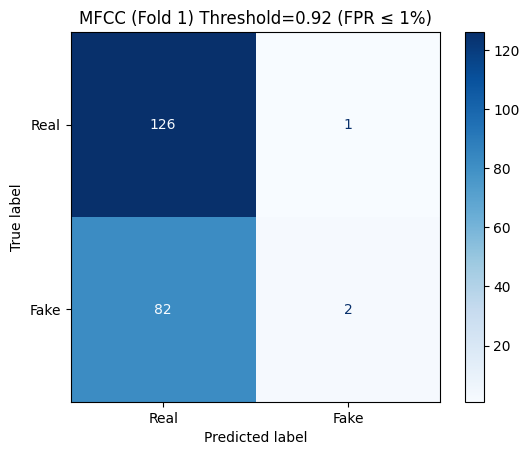

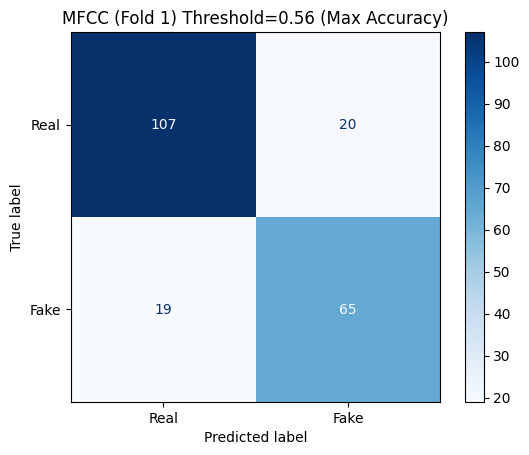

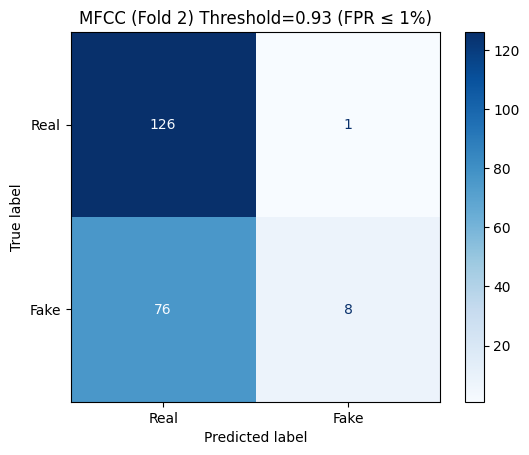

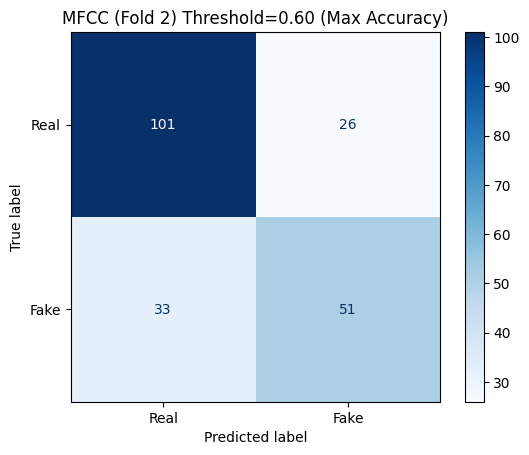

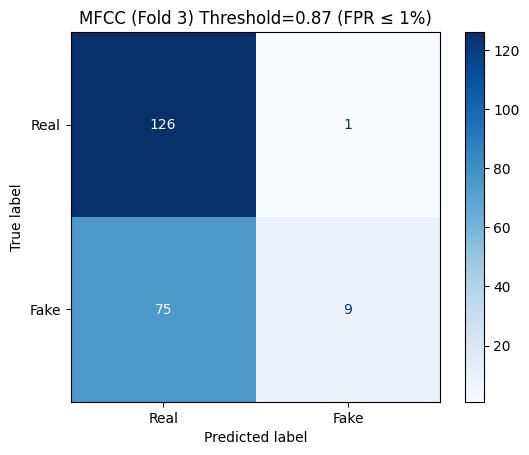

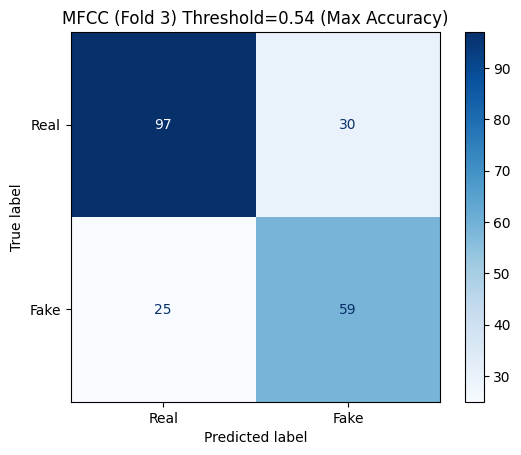

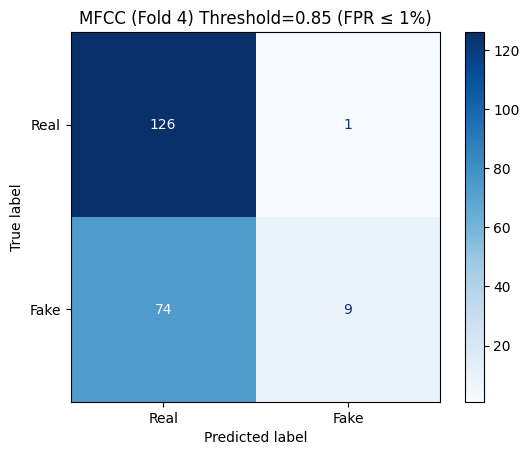

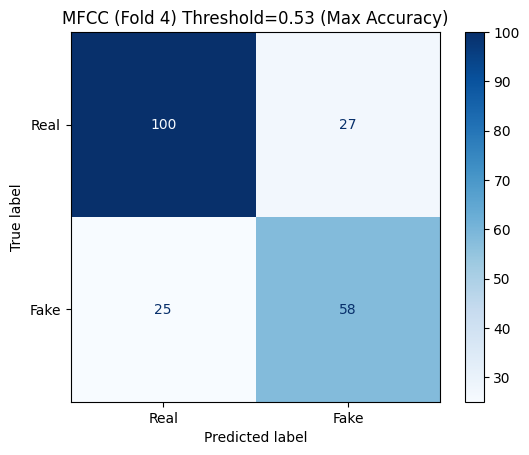

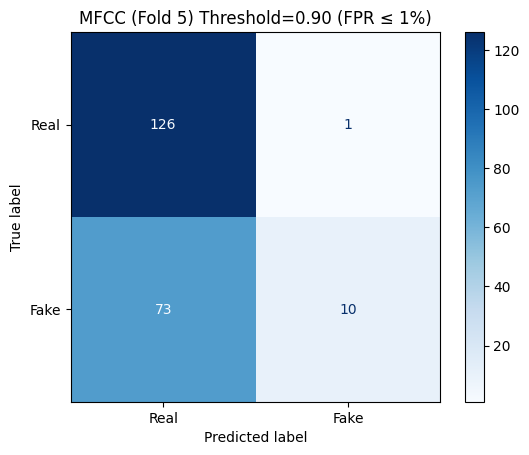

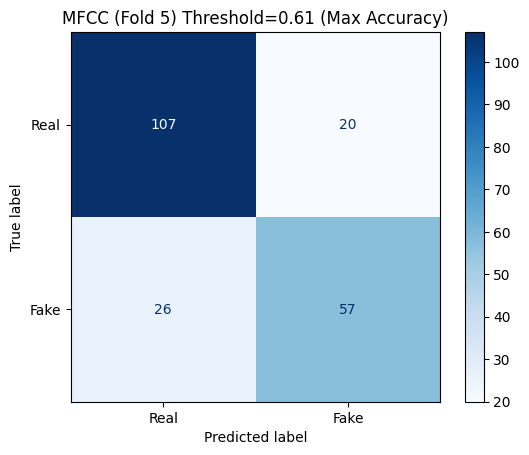


--- Wav2Vec2 ---


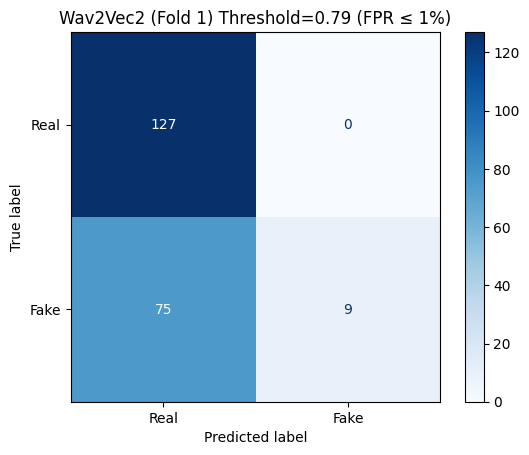

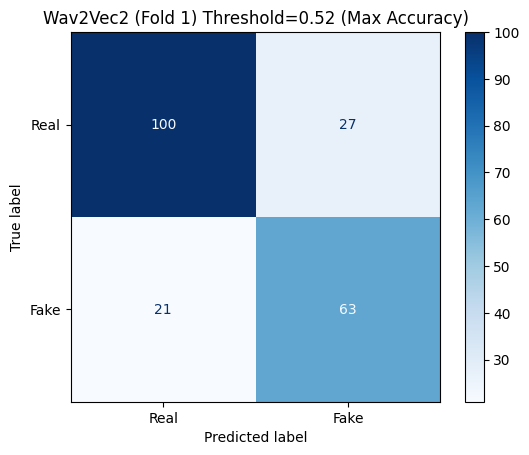

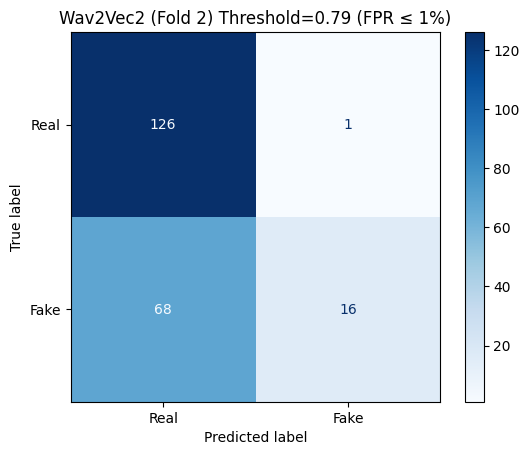

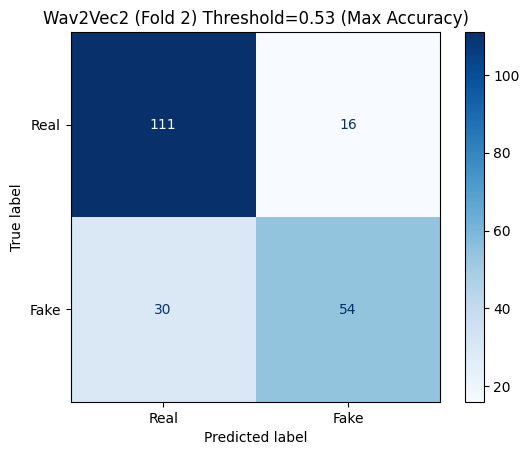

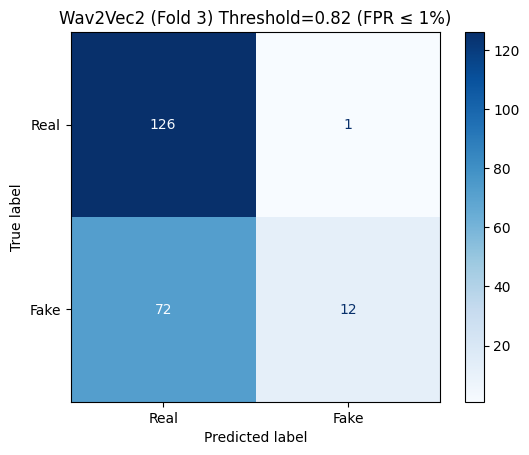

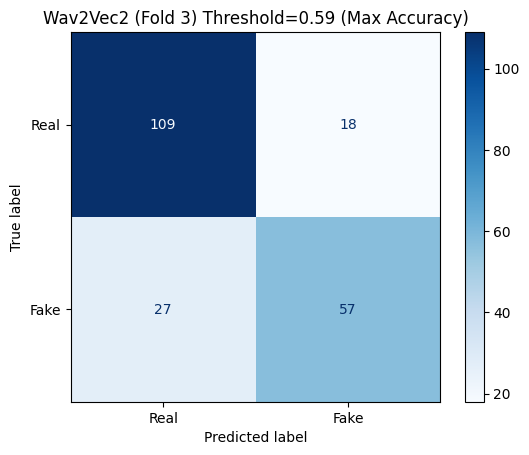

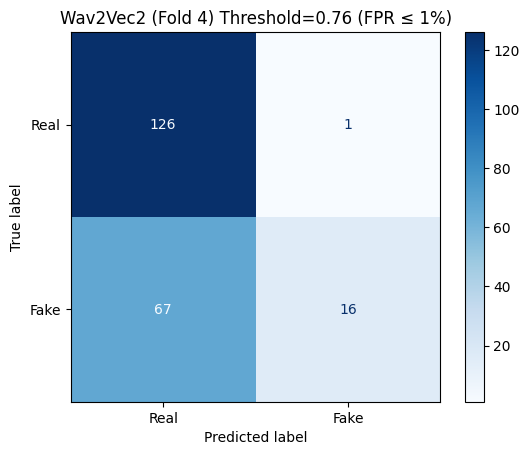

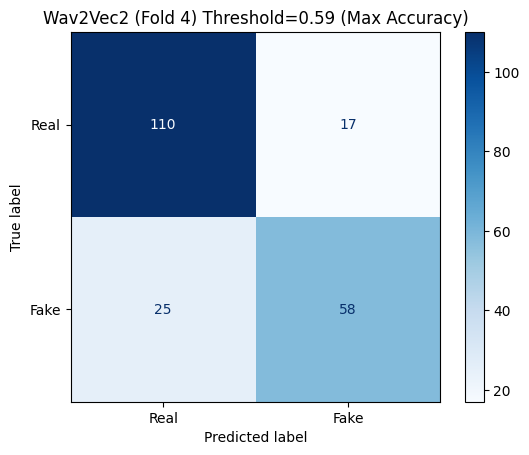

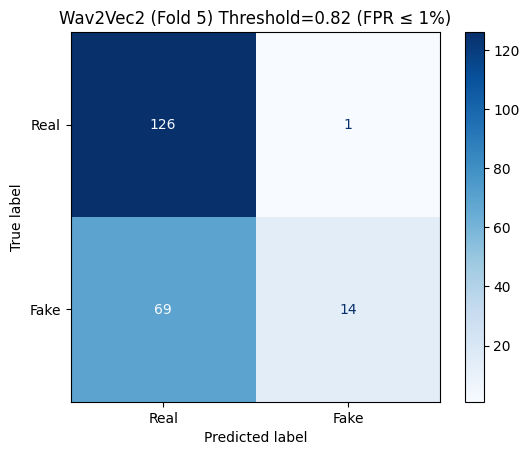

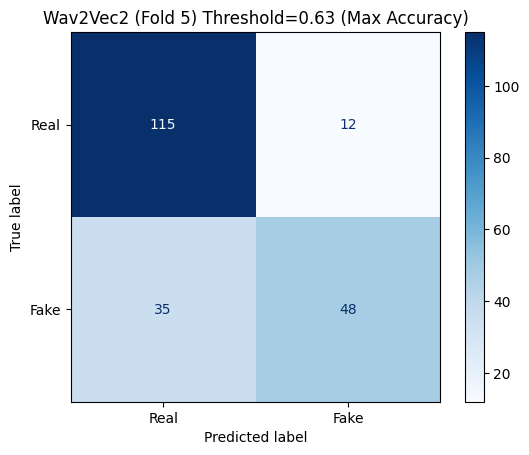


--- HuBERT ---


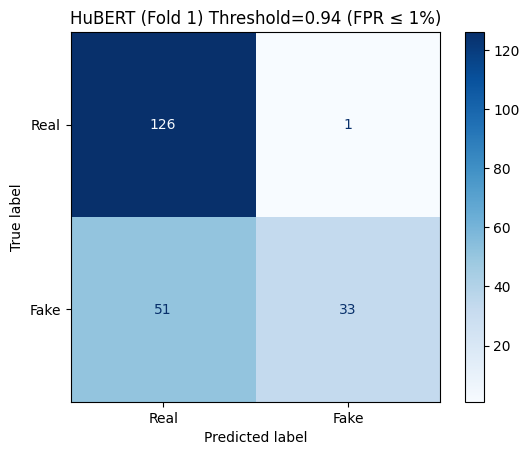

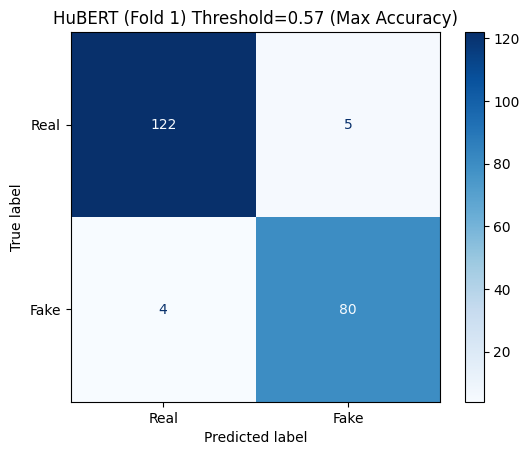

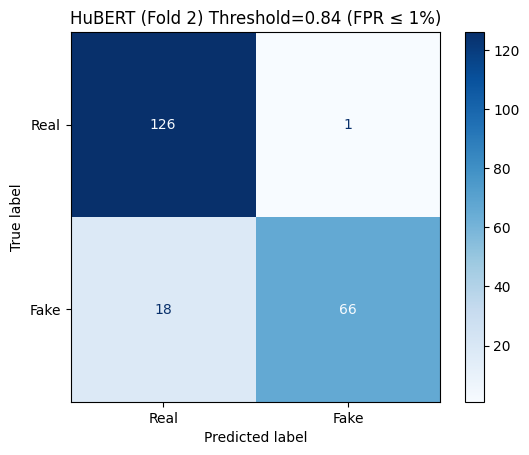

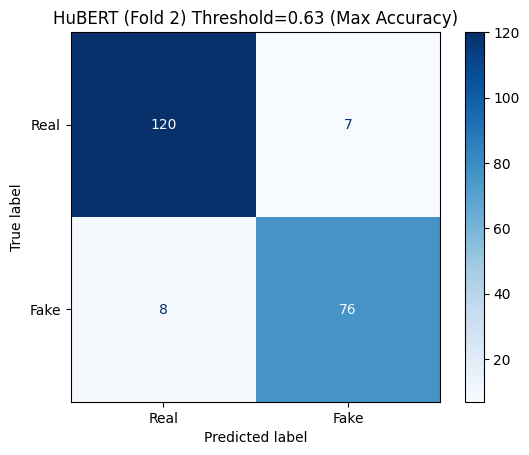

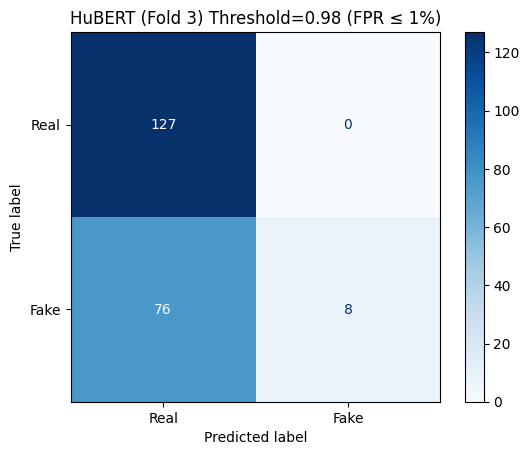

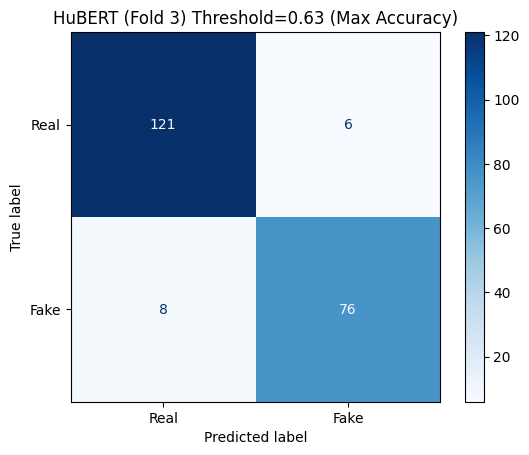

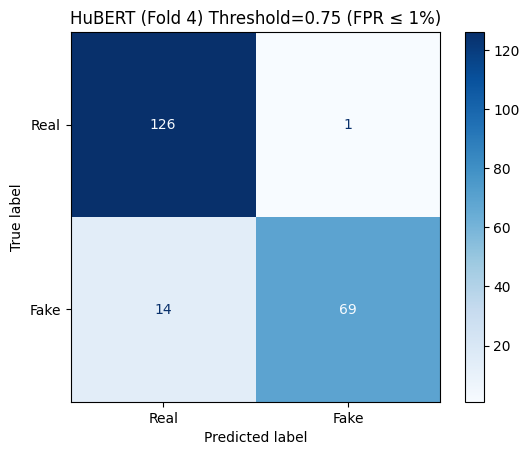

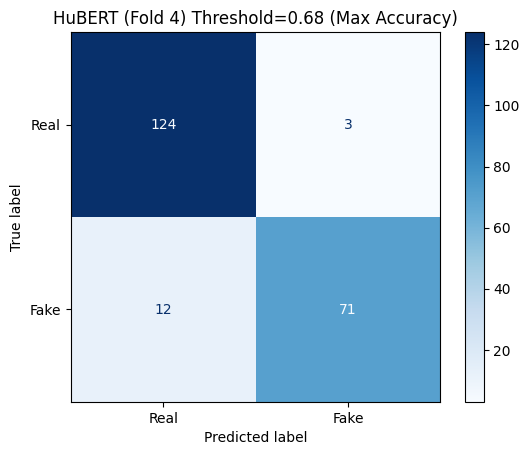

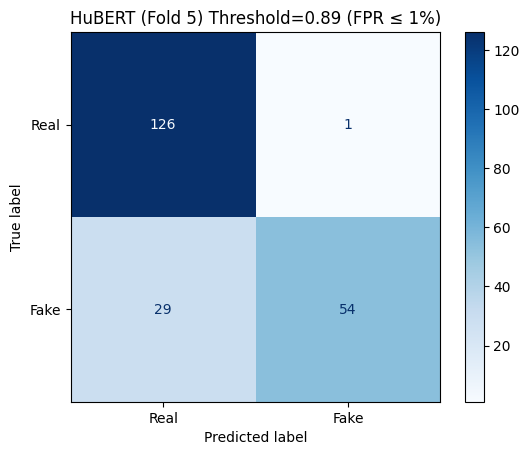

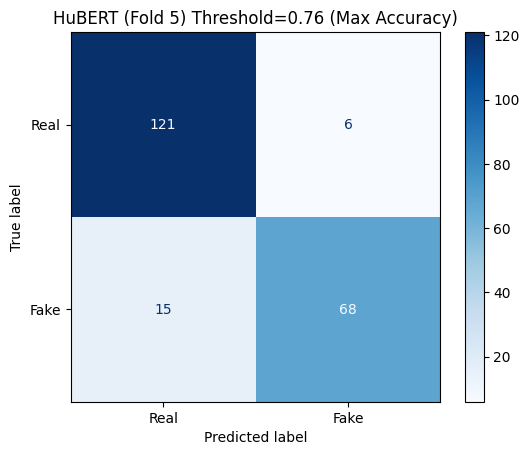


--- OpenL3 ---


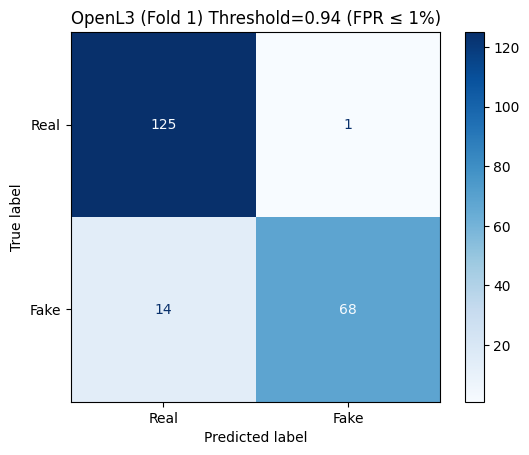

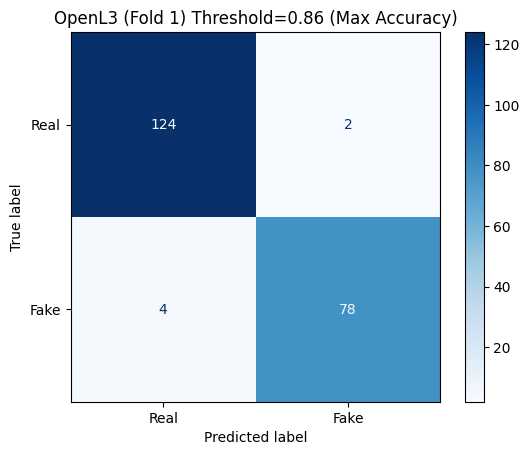

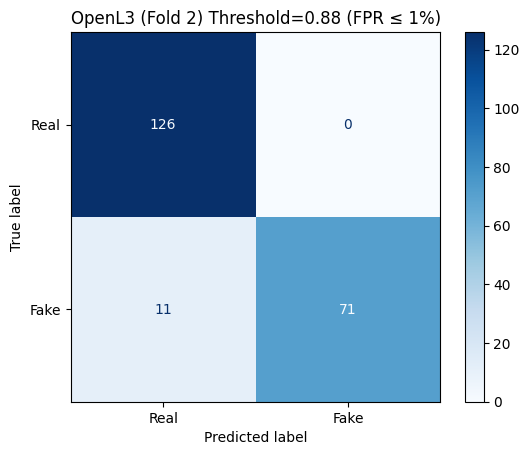

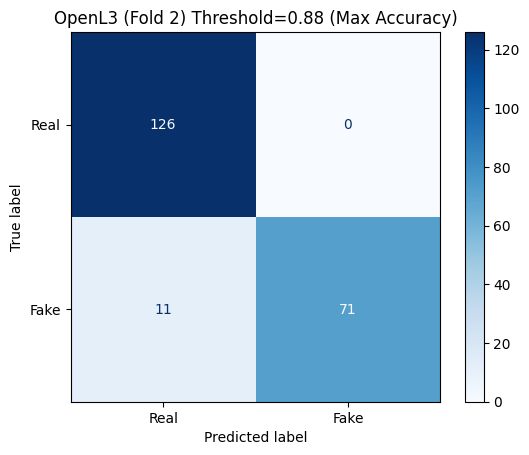

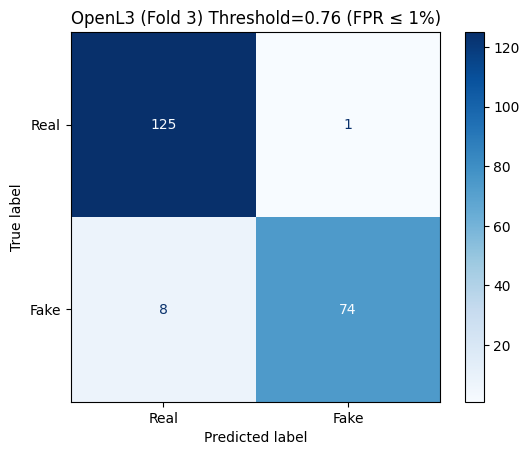

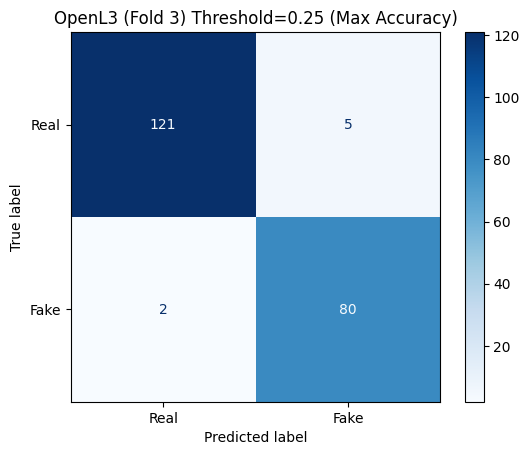

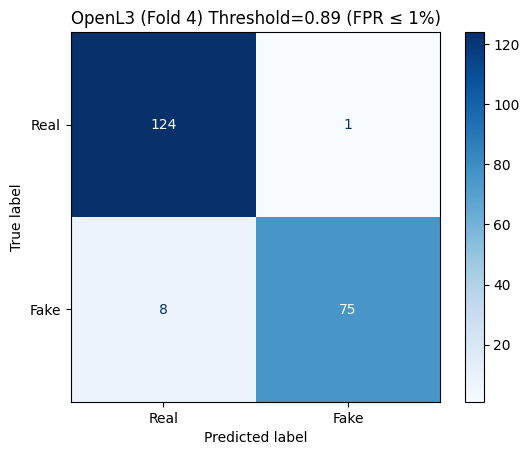

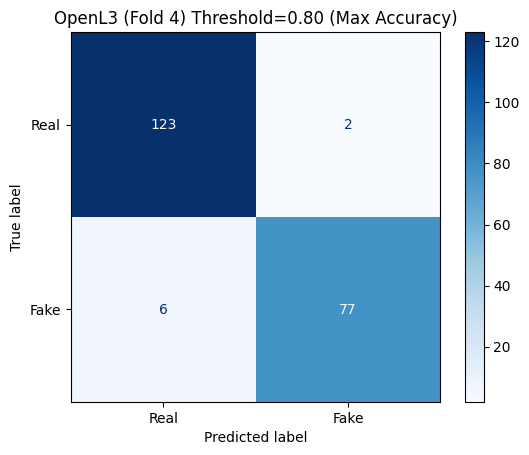

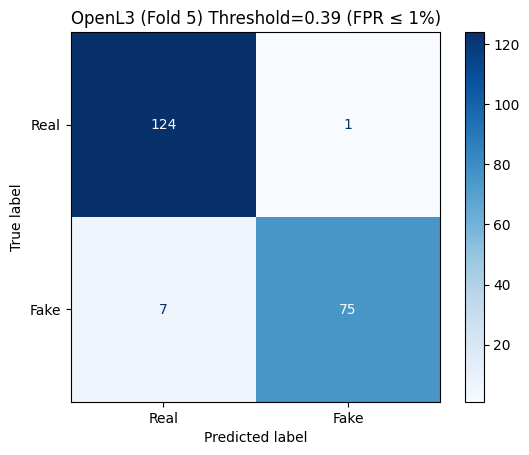

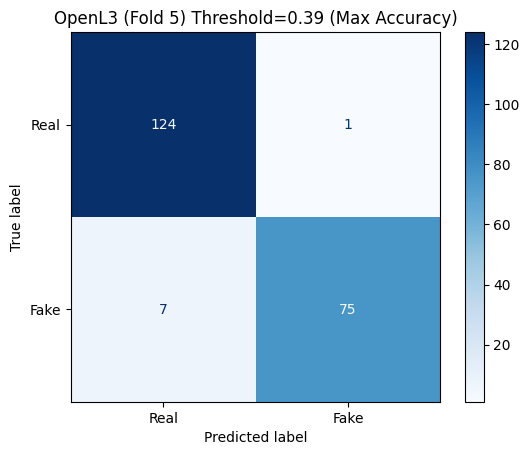

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

# Dictionary of embeddings
embedding_sets = {
    'MFCC': (X_mfcc, y_mfcc),
    'Wav2Vec2': (X_wav2vec, y_wav2vec),
    'HuBERT': (X_hubert, y_hubert),
    # 'VGGish': (X_vggish, y_vggish),
    'OpenL3': (X_openl3, y_openl3),
}

n_splits = 5
results = {}

for name, (X, y) in embedding_sets.items():
    y = 1 - y  # Flip labels so FAKE = 1
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    print(f"\n--- {name} ---")

    accs, f1s, aucs = [], [], []
    fnrs, roc_aucs = [], []

    for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        clf = LogisticRegression(max_iter=1000, class_weight='balanced')
        clf.fit(X_train, y_train)

        y_probs = clf.predict_proba(X_test)[:, 1]

        # Use your existing evaluation function
        display_title = f"{name} (Fold {fold_idx+1})"
        eval_results = evaluate_model(y_test, y_probs, display_title=display_title)

        accs.append(eval_results['max_acc'])
        fnrs.append(eval_results['fnr_at_1%fpr'])
        roc_aucs.append(eval_results['roc_auc'])

    results[name] = {
        'Accuracy (mean)': np.mean(accs),
        'FNR@1%FPR (mean)': np.mean(fnrs),
        'ROC AUC (mean)': np.mean(roc_aucs),
        'Accuracy (std)': np.std(accs),
        'FNR@1%FPR (std)': np.std(fnrs),
        'ROC AUC (std)': np.std(roc_aucs),
    }


In [ ]:
print(results)

{'MFCC': {'Accuracy (mean)': np.float64(0.7616429699842022), 'FNR@1%FPR (mean)': np.float64(0.9089787722317842), 'ROC AUC (mean)': np.float64(0.7914287069537995), 'Accuracy (std)': np.float64(0.03323739426558233), 'FNR@1%FPR (std)': np.float64(0.03454339387232024), 'ROC AUC (std)': np.float64(0.03152376813609658)}, 'Wav2Vec2': {'Accuracy (mean)': np.float64(0.7834845407357255), 'FNR@1%FPR (mean)': np.float64(0.8396156052782558), 'ROC AUC (mean)': np.float64(0.81182864190169), 'Accuracy (std)': np.float64(0.009582566750665716), 'FNR@1%FPR (std)': np.float64(0.032140344924422054), 'ROC AUC (std)': np.float64(0.0157483308850074)}, 'HuBERT': {'Accuracy (mean)': np.float64(0.9296953283683143), 'FNR@1%FPR (mean)': np.float64(0.4488525530694205), 'ROC AUC (mean)': np.float64(0.9666797674387088), 'Accuracy (std)': np.float64(0.018242172937128515), 'FNR@1%FPR (std)': np.float64(0.2743434631312601), 'ROC AUC (std)': np.float64(0.009876406749346818)}, 'OpenL3': {'Accuracy (mean)': np.float64(0.96